# Projeto 1-Ciencia de dados

## Comunidade andina


Nome: Willian Kenzo Asanuma Lee

## Pergunta a ser respondida? 

Houve aumento das exportações/importações após 1992, no qual foi criado uma zona de livre comercio entre eles?


## Explicação de hipótese e mecanismo

Uma das principais funções na criação de uma zona de livre comércio é aumentar a troca de produtos entre tais países, por meio da redução de taxas de importação aplicadas a produtos oriundos dos seus integrantes, estimulando a abertura de novos negócios e subsequentemente a geração de novos empregos.
-para analisar tal fato, será analisado a taxa de desemprego desses paises com outros que não pertencem a esse grupo e o GDP.

Sendo criado uma zona de livre comércio, no qual seu objetivo é estimular o comércio entre os países participantes, acredita-se que estimula os negócios com a redução das taxas alfandegarias.


https://pdfs.semanticscholar.org/7284/6d7b8bd92dd74108f9fcb59f668adde2badd.pdf
https://pdfs.semanticscholar.org/36aa/426ac1a1e5ca29fa5e19de2e4b075328e31b.pdf

## Análise de dados
    

### Importações e leituras
O programa importa as bibliotecas e le os arquivos que serão utilziados.

In [110]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


print(os.getcwd())



C:\Users\Willian\Desktop\CD\Projeto-1


In [111]:
export=pd.read_excel('ExportGDP.xlsx')
imports=pd.read_excel('ImportGDP.xlsx')

export.head()

,Exports of goods and services (% of GDP),1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,4.453443,4.878051,9.171601,8.888893,11.258279,8.571429,6.772908,8.899677,10.094637,...,32.438501,42.295500,32.931170,30.550988,27.640178,22.926131,26.676120,22.860093,20.124519,18.106142
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.419307,20.619399,21.542118,22.273069,25.090526,28.777169,29.511318,28.411549,32.427471,33.800932
4,Algeria,46.244557,19.793872,24.684682,25.084059,22.603944,25.986197,23.434417,23.135635,23.788777,...,35.076150,38.266470,40.071885,47.646353,48.607848,46.609494,46.273658,29.289305,30.830405,NaN


In [112]:
export_idx = export.set_index('Exports of goods and services (% of GDP)')
import_idx = imports.set_index('Imports of goods and services (% of GDP)')

In [113]:
exp_imp = export_idx.join(import_idx, how='inner', rsuffix='_imp', lsuffix='_exp')

In [114]:
exp_imp['ComunidadeAndina']=0
exp_imp['PaisesComparados']=0

exp_imp.head()

,1961_exp,1962_exp,1963_exp,1964_exp,1965_exp,1966_exp,1967_exp,1968_exp,1969_exp,1970_exp,...,2004_imp,2005_imp,2006_imp,2007_imp,2008_imp,2009_imp,2010_imp,2011_imp,ComunidadeAndina,PaisesComparados
Afghanistan,4.453443,4.878051,9.171601,8.888893,11.258279,8.571429,6.772908,8.899677,10.094637,9.784002,...,77.566508,71.264727,67.706160,59.000138,47.654833,59.915922,53.562257,NaN,0,0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.306502,46.326121,49.151140,54.964723,56.119277,54.235682,51.752734,NaN,0,0
Algeria,46.244557,19.793872,24.684682,25.084059,22.603944,25.986197,23.434417,23.135635,23.788777,22.072734,...,25.652123,24.269903,21.516682,23.293057,22.908630,24.820752,21.496679,NaN,0,0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [115]:
comunidadeandina=['Colombia','Peru','Ecuador','Bolivia']
paisescomparados=['Brazil','Chile','Argentina','Venezuela','Paraguay','Mexico']
exp_imp.loc[comunidadeandina,['ComunidadeAndina']]=1
exp_imp.loc[paisescomparados,['PaisesComparados']]=1

In [116]:
dados_comunidadeandina=exp_imp.loc[exp_imp.ComunidadeAndina == 1]
dados_comunidadeandina


,1961_exp,1962_exp,1963_exp,1964_exp,1965_exp,1966_exp,1967_exp,1968_exp,1969_exp,1970_exp,...,2004_imp,2005_imp,2006_imp,2007_imp,2008_imp,2009_imp,2010_imp,2011_imp,ComunidadeAndina,PaisesComparados
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.594505,...,26.325876,32.093798,32.766134,34.266255,37.960465,32.904449,34.324170,NaN,1,0
Colombia,12.955780,12.191377,11.976231,11.919976,11.420681,12.112785,11.976380,12.984214,13.226423,14.310678,...,19.258893,18.790116,20.660378,19.937885,20.272225,18.180863,17.927930,NaN,1,0
Ecuador,16.493213,17.889721,16.246073,15.654251,16.248990,17.704427,16.792323,16.944801,14.039125,15.232975,...,29.267045,32.000926,32.967023,34.434145,37.790252,31.974992,38.618483,NaN,1,0
Peru,21.375351,20.510689,18.950042,19.017476,16.097923,15.987461,15.844299,18.602499,17.941299,17.892857,...,17.815715,19.166859,19.855129,22.411906,27.082653,20.396522,22.247876,NaN,1,0


In [117]:
dados_comparacao=exp_imp.loc[exp_imp.PaisesComparados==1]
dados_comparacao.head()

,1961_exp,1962_exp,1963_exp,1964_exp,1965_exp,1966_exp,1967_exp,1968_exp,1969_exp,1970_exp,...,2004_imp,2005_imp,2006_imp,2007_imp,2008_imp,2009_imp,2010_imp,2011_imp,ComunidadeAndina,PaisesComparados
Argentina,5.994947,4.691843,7.890454,5.563716,6.225874,6.652917,7.495596,6.484453,6.398713,5.601567,...,18.167248,19.188720,19.232168,20.337126,20.650425,16.002351,18.400200,NaN,0,1
Brazil,7.279410,3.868761,9.036455,6.385409,7.735761,6.824735,5.768971,6.000526,6.620404,7.029436,...,12.548146,11.520003,11.465745,11.846759,13.474681,11.177423,12.146704,NaN,0,1
Chile,12.041443,11.921820,12.264631,12.609890,13.605442,14.809330,14.269406,13.977390,16.456235,14.612954,...,31.584870,32.812127,30.708792,33.243500,41.070656,31.210657,31.847230,NaN,0,1
Mexico,8.416078,8.557251,8.331766,7.636821,7.637846,7.465729,6.868679,7.037058,7.538180,7.749880,...,28.373704,28.553069,29.215821,29.507969,30.280773,29.064917,31.735666,NaN,0,1
Paraguay,19.217292,12.629500,11.559751,12.256633,14.957803,13.246339,12.218457,12.355364,13.577676,14.917086,...,50.005335,55.609663,58.237354,53.916445,55.564397,51.597401,54.955957,NaN,0,1


# Juntando os dados de comparação e os dados da comunidade andina


In [118]:
dados_juntos=pd.concat([dados_comparacao,dados_comunidadeandina])
dados_juntos

,1961_exp,1962_exp,1963_exp,1964_exp,1965_exp,1966_exp,1967_exp,1968_exp,1969_exp,1970_exp,...,2004_imp,2005_imp,2006_imp,2007_imp,2008_imp,2009_imp,2010_imp,2011_imp,ComunidadeAndina,PaisesComparados
Argentina,5.994947,4.691843,7.890454,5.563716,6.225874,6.652917,7.495596,6.484453,6.398713,5.601567,...,18.167248,19.188720,19.232168,20.337126,20.650425,16.002351,18.400200,NaN,0,1
Brazil,7.279410,3.868761,9.036455,6.385409,7.735761,6.824735,5.768971,6.000526,6.620404,7.029436,...,12.548146,11.520003,11.465745,11.846759,13.474681,11.177423,12.146704,NaN,0,1
Chile,12.041443,11.921820,12.264631,12.609890,13.605442,14.809330,14.269406,13.977390,16.456235,14.612954,...,31.584870,32.812127,30.708792,33.243500,41.070656,31.210657,31.847230,NaN,0,1
Mexico,8.416078,8.557251,8.331766,7.636821,7.637846,7.465729,6.868679,7.037058,7.538180,7.749880,...,28.373704,28.553069,29.215821,29.507969,30.280773,29.064917,31.735666,NaN,0,1
Paraguay,19.217292,12.629500,11.559751,12.256633,14.957803,13.246339,12.218457,12.355364,13.577676,14.917086,...,50.005335,55.609663,58.237354,53.916445,55.564397,51.597401,54.955957,NaN,0,1
Venezuela,28.672805,29.170225,28.872649,26.822811,25.815217,24.337712,24.294020,22.369669,21.330902,20.920502,...,19.169102,20.468677,22.146970,25.296647,21.114516,20.469792,17.174972,NaN,0,1
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.594505,...,26.325876,32.093798,32.766134,34.266255,37.960465,32.904449,34.324170,NaN,1,0
Colombia,12.955780,12.191377,11.976231,11.919976,11.420681,12.112785,11.976380,12.984214,13.226423,14.310678,...,19.258893,18.790116,20.660378,19.937885,20.272225,18.180863,17.927930,NaN,1,0
Ecuador,16.493213,17.889721,16.246073,15.654251,16.248990,17.704427,16.792323,16.944801,14.039125,15.232975,...,29.267045,32.000926,32.967023,34.434145,37.790252,31.974992,38.618483,NaN,1,0
Peru,21.375351,20.510689,18.950042,19.017476,16.097923,15.987461,15.844299,18.602499,17.941299,17.892857,...,17.815715,19.166859,19.855129,22.411906,27.082653,20.396522,22.247876,NaN,1,0


In [119]:
exportacao=dados_juntos.loc[:,['1970_exp','1971_exp','1972_exp','1973_exp','1974_exp','1975_exp','1976_exp','1977_exp','1978_exp','1979_exp','1980_exp','1981_exp','1982_exp','1983_exp','1940_exp','1985_exp','1986_exp','1987_exp','1988_exp','1989_exp','1990_exp','1991_exp','1992_exp','1993_exp','1994_exp','1995_exp','1996_exp','1997_exp','1998_exp','1999_exp','2000_exp']]
exportacao.head(10)


,1970_exp,1971_exp,1972_exp,1973_exp,1974_exp,1975_exp,1976_exp,1977_exp,1978_exp,1979_exp,...,1991_exp,1992_exp,1993_exp,1994_exp,1995_exp,1996_exp,1997_exp,1998_exp,1999_exp,2000_exp
Argentina,5.601567,6.007233,7.197766,7.612668,6.902571,5.824052,9.175388,9.615892,8.608390,6.510915,...,7.675043,6.598187,6.909352,7.521832,9.648808,10.399127,10.528654,10.385004,9.787988,10.885465
Brazil,7.029436,6.413307,7.259176,8.271678,8.013119,7.538573,7.035714,7.252368,6.675579,7.123905,...,8.676973,10.868250,10.503270,8.456925,7.256806,6.566742,6.820657,6.932775,9.411089,9.978194
Chile,14.612954,11.028567,9.821874,13.653825,20.382326,25.437686,25.124960,20.620943,20.582674,23.276835,...,32.396379,29.811927,26.623158,28.237889,29.302786,27.276775,27.083765,26.299911,29.598014,29.287151
Mexico,7.749880,7.640237,8.064081,8.413335,8.411407,6.894142,8.490029,10.317626,10.469189,11.190915,...,16.364871,15.237793,15.247614,16.788715,30.362374,32.076500,30.266888,30.694360,30.737509,30.939060
Paraguay,14.917086,13.375370,13.766912,14.963687,15.508458,13.208954,14.660226,19.453970,18.420236,16.058246,...,30.170489,28.071291,36.930577,53.998102,59.427741,50.342996,44.035922,50.237290,36.756226,38.229142
Venezuela,20.920502,22.406015,20.441989,25.086705,38.664596,28.828181,25.808457,23.216187,20.407174,25.960372,...,31.353268,26.353007,26.958345,30.863330,27.107147,36.514149,29.259011,20.920486,22.911709,29.744220
Bolivia,24.594505,21.392347,21.112440,27.713370,35.292438,25.938318,27.675648,26.774129,22.595144,24.174703,...,21.479347,20.045761,19.080765,21.663312,22.551422,22.581870,21.110603,19.698685,16.880899,18.274745
Colombia,14.310678,12.829889,14.239455,15.216318,14.578887,15.798256,17.096586,16.898757,16.602767,15.225219,...,21.343183,17.708464,16.428932,14.998362,14.533743,15.199462,14.841544,15.007351,18.346579,15.915140
Ecuador,15.232975,16.306361,20.041429,25.954494,36.576667,25.962574,25.281492,25.787344,21.620578,25.866027,...,35.405097,36.027020,25.092985,24.637914,25.727868,26.387061,25.630393,21.487854,31.528127,37.065394
Peru,17.892857,14.217100,14.124783,13.689039,14.499138,10.850615,12.048881,15.896706,20.733183,27.741325,...,12.648014,12.764758,12.191430,12.247832,12.594797,13.298722,14.359290,13.135964,15.033003,16.001306


In [120]:
importacao=dados_juntos.loc[:,['1970_imp','1971_imp','1972_imp','1973_imp','1974_imp','1975_imp','1976_imp','1977_imp','1978_imp','1979_imp','1980_imp','1981_imp','1982_imp','1983_imp','1940_imp','1985_imp','1986_imp','1987_imp','1988_imp','1989_imp','1990_imp','1991_imp','1992_imp','1993_imp','1994_imp','1995_imp','1996_imp','1997_imp','1998_imp','1999_imp','2000_imp']]
importacao.head(10)

,1970_imp,1971_imp,1972_imp,1973_imp,1974_imp,1975_imp,1976_imp,1977_imp,1978_imp,1979_imp,...,1991_imp,1992_imp,1993_imp,1994_imp,1995_imp,1996_imp,1997_imp,1998_imp,1999_imp,2000_imp
Argentina,4.735877,6.607956,6.837877,5.709501,6.289009,5.978672,5.921496,7.326394,5.715406,6.329769,...,6.078011,8.132793,9.313800,10.600049,10.075306,11.068685,12.772670,12.931598,11.534090,11.519271
Brazil,7.449759,8.137973,8.844076,9.501581,13.883728,11.505580,9.432618,7.917748,7.864394,9.175568,...,7.913944,8.385095,9.096046,9.161622,8.775002,8.366099,9.020423,8.932220,10.816056,11.741680
Chile,14.020537,12.024202,13.234560,15.468089,19.705883,27.410518,20.795858,22.422818,23.925948,26.107768,...,27.770304,28.169026,28.618885,26.574231,27.102641,28.965174,29.203071,29.565982,27.325768,29.732518
Mexico,9.651780,8.719090,8.834188,9.466294,10.575890,9.619655,9.867471,10.220744,11.037890,12.452906,...,19.272452,20.271540,19.173684,21.603356,27.703432,30.018927,30.373465,32.814135,32.356554,32.933220
Paraguay,16.121025,15.942963,13.839152,14.270111,17.777262,18.667919,18.038576,22.441315,22.114577,21.556093,...,38.214349,38.583483,47.868100,67.362479,71.248196,62.215452,58.816485,59.724579,46.628129,48.967831
Venezuela,16.903765,16.842105,17.541435,16.763005,16.692546,21.926671,25.062186,30.031949,31.555987,24.666395,...,26.226900,28.908748,27.181195,22.299270,21.815998,21.327246,21.986026,22.678906,19.158522,18.113002
Bolivia,24.354518,24.404487,24.019139,28.318759,26.797697,32.216634,29.885310,29.646490,30.108242,27.396076,...,26.965621,29.065094,28.386360,27.197539,27.186567,27.274420,29.359060,32.582478,27.287357,27.323030
Colombia,15.817064,16.678854,14.766842,14.393815,15.509454,14.070322,13.902718,13.267619,13.744012,13.458758,...,13.908308,15.757102,18.759326,20.919176,20.963487,20.844645,20.755524,20.901572,17.802701,16.745017
Ecuador,22.222222,28.412599,25.686172,25.028925,31.533366,32.157455,28.219565,28.893384,28.077171,27.024208,...,32.028565,31.181720,26.687034,26.350078,28.258070,24.092531,25.715011,28.359493,24.955020,30.996610
Peru,16.000000,15.177715,14.789139,15.765331,21.930666,21.941688,20.226132,22.721557,20.059958,19.088278,...,14.488706,15.607476,16.017494,15.695883,18.253135,18.153522,18.582408,18.531965,17.455984,18.156123


In [121]:
importacao_export_data=dados_juntos.loc[:,['1990_exp','1990_imp','1996_exp','1996_imp','2002_exp','2002_imp','2008_exp','2008_imp']]

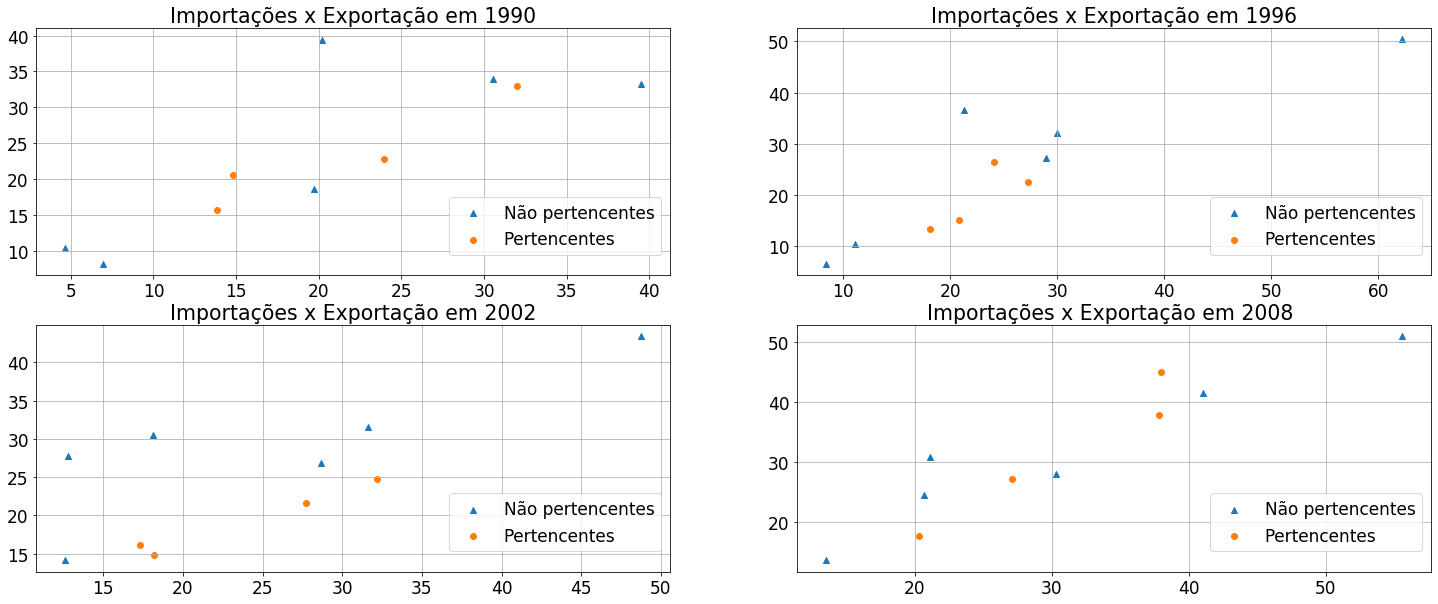

In [124]:
plt.figure(figsize=(25,10))

plt.rc('legend',fontsize=17)
plt.rc('font',size=17)



plt.subplot(221)
plot=plt.scatter(dados_comparacao['1990_imp'],dados_comparacao['1990_exp'],marker='^')
plt.scatter(dados_comunidadeandina['1990_imp'],dados_comunidadeandina['1990_exp'],marker='o')
plt.legend(('Não pertencentes','Pertencentes'),loc='center right', bbox_to_anchor=(1,0.2))
plt.title('Importações x Exportação em 1990')
plt.grid()

plt.subplot(222)
plot=plt.scatter(dados_comparacao['1996_imp'],dados_comparacao['1996_exp'],marker='^')
plt.scatter(dados_comunidadeandina['1996_imp'],dados_comunidadeandina['1996_exp'],marker='o')
plt.legend(('Não pertencentes','Pertencentes'),loc='center right', bbox_to_anchor=(1,0.2))
plt.title('Importações x Exportação em 1996')
plt.grid()

plt.subplot(223)
plot=plt.scatter(dados_comparacao['2002_imp'],dados_comparacao['2002_exp'],marker='^')
plt.scatter(dados_comunidadeandina['2002_imp'],dados_comunidadeandina['2002_exp'],marker='o')
plt.legend(('Não pertencentes','Pertencentes'),loc='center right', bbox_to_anchor=(1,0.2))
plt.title('Importações x Exportação em 2002')
plt.grid()

plt.subplot(224)
plot=plt.scatter(dados_comparacao['2008_imp'],dados_comparacao['2008_exp'],marker='^')
plt.scatter(dados_comunidadeandina['2008_imp'],dados_comunidadeandina['2008_exp'],marker='o')
plt.legend(('Não pertencentes','Pertencentes'),loc='center right', bbox_to_anchor=(1,0.2))
plt.title('Importações x Exportação em 2008 ')
plt.grid()




plt.tight_layout
plt.show()

In [125]:
importacoes_peru=
importacoes_equador
importacoes_colombia
importacoes_boliviae
exportacoes_peru
exportacoes_equadore
exportacoes_colombiae
exportacoes_bolivia

#Paises que serão comparados
importacoes_brazil
importacoes_chile
importacoes_argentina
importacoes_venezuela
imporacoes_mexico
importacoes_paraguai
exportacoes_brazil
exportacoes_chile
exportacoes_argentina
exportacoes_venezuela
exportacoes_mexico
exportacoes_paraguai



SyntaxError: invalid syntax (<ipython-input-125-9e30a531a699>, line 1)

In [126]:
exportacao_comparacao_selec=dados_comparacao.loc[:,['1992_exp','1993_exp','1994_exp','1996_exp','2002_exp','2008_exp']]


In [127]:
importacao_comparacao_selec=dados_comparacao.loc[:,['1992_imp','1993_imp','1994_imp','1996_imp','2002_imp','2008_imp']]
importacao_comunidade_selec=dados_comunidadeandina.loc[:,['1992_imp','1993_imp','1994_imp','1996_imp','2002_imp','2008_imp']]
exportacao_comparacao_selec=dados_comparacao.loc[:,['1992_exp','1993_exp','1994_exp','1996_exp','2002_exp','2008_exp']]
a=dados_comunidadeandina.loc[:,['1992_exp','1993_exp','1994_exp','1996_exp','2002_exp','2008_exp']]




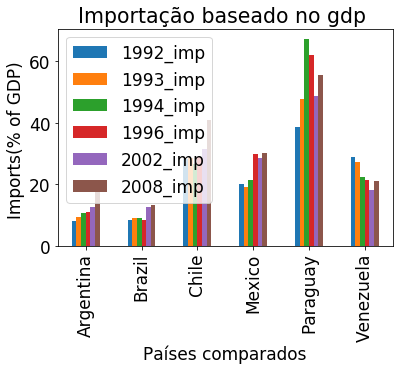

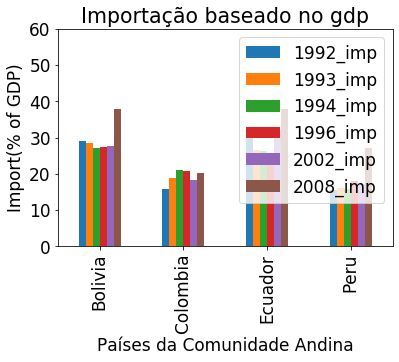

In [128]:

plot = importacao_comparacao_selec.plot(kind='bar',title='Importação baseado no gdp ')
plt.ylabel('Imports(% of GDP) ')
plt.xlabel('Países comparados')

plot = importacao_comunidade_selec.plot(kind='bar',title='Importação baseado no gdp')
plt.ylabel('Import(% of GDP)')
plt.xlabel('Países da Comunidade Andina')
plt.ylim(0,60)

plt.show()

TypeError: 'DataFrame' object is not callable

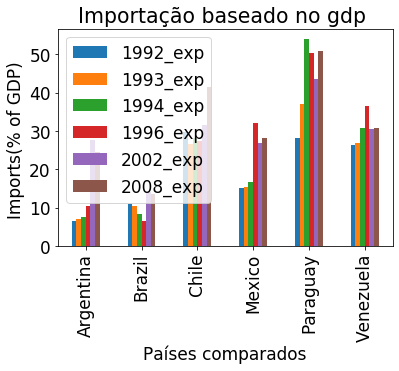

In [129]:
plot = exportacao_comparacao_selec.plot(kind='bar',title='Importação baseado no gdp ')
plt.ylabel('Imports(% of GDP) ')
plt.xlabel('Países comparados')

plot = a(kind='bar',title='Importação baseado no gdp')
plt.ylabel('Import(% of GDP)')
plt.xlabel('Países da Comunidade Andina')
plt.ylim(0,60)

plt.show()

In [130]:
dados_juntos.head(10)

,1961_exp,1962_exp,1963_exp,1964_exp,1965_exp,1966_exp,1967_exp,1968_exp,1969_exp,1970_exp,...,2004_imp,2005_imp,2006_imp,2007_imp,2008_imp,2009_imp,2010_imp,2011_imp,ComunidadeAndina,PaisesComparados
Argentina,5.994947,4.691843,7.890454,5.563716,6.225874,6.652917,7.495596,6.484453,6.398713,5.601567,...,18.167248,19.188720,19.232168,20.337126,20.650425,16.002351,18.400200,NaN,0,1
Brazil,7.279410,3.868761,9.036455,6.385409,7.735761,6.824735,5.768971,6.000526,6.620404,7.029436,...,12.548146,11.520003,11.465745,11.846759,13.474681,11.177423,12.146704,NaN,0,1
Chile,12.041443,11.921820,12.264631,12.609890,13.605442,14.809330,14.269406,13.977390,16.456235,14.612954,...,31.584870,32.812127,30.708792,33.243500,41.070656,31.210657,31.847230,NaN,0,1
Mexico,8.416078,8.557251,8.331766,7.636821,7.637846,7.465729,6.868679,7.037058,7.538180,7.749880,...,28.373704,28.553069,29.215821,29.507969,30.280773,29.064917,31.735666,NaN,0,1
Paraguay,19.217292,12.629500,11.559751,12.256633,14.957803,13.246339,12.218457,12.355364,13.577676,14.917086,...,50.005335,55.609663,58.237354,53.916445,55.564397,51.597401,54.955957,NaN,0,1
Venezuela,28.672805,29.170225,28.872649,26.822811,25.815217,24.337712,24.294020,22.369669,21.330902,20.920502,...,19.169102,20.468677,22.146970,25.296647,21.114516,20.469792,17.174972,NaN,0,1
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.594505,...,26.325876,32.093798,32.766134,34.266255,37.960465,32.904449,34.324170,NaN,1,0
Colombia,12.955780,12.191377,11.976231,11.919976,11.420681,12.112785,11.976380,12.984214,13.226423,14.310678,...,19.258893,18.790116,20.660378,19.937885,20.272225,18.180863,17.927930,NaN,1,0
Ecuador,16.493213,17.889721,16.246073,15.654251,16.248990,17.704427,16.792323,16.944801,14.039125,15.232975,...,29.267045,32.000926,32.967023,34.434145,37.790252,31.974992,38.618483,NaN,1,0
Peru,21.375351,20.510689,18.950042,19.017476,16.097923,15.987461,15.844299,18.602499,17.941299,17.892857,...,17.815715,19.166859,19.855129,22.411906,27.082653,20.396522,22.247876,NaN,1,0


In [140]:
#importações
y=dados_juntos.iloc[9,19:48]

equador_export=dados_juntos.iloc[8,19:48]

colombia_export=dados_juntos.iloc[7,19:48]

bolivia_export=dados_juntos.iloc[6,19:48]
#
#exportações
peru_import=dados_juntos.iloc[9,71:100]

equador_import=dados_juntos.iloc[8,71:100]

colombia_import=dados_juntos.iloc[7,71:100]

bolivia_import=dados_juntos.iloc[6,71:100]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


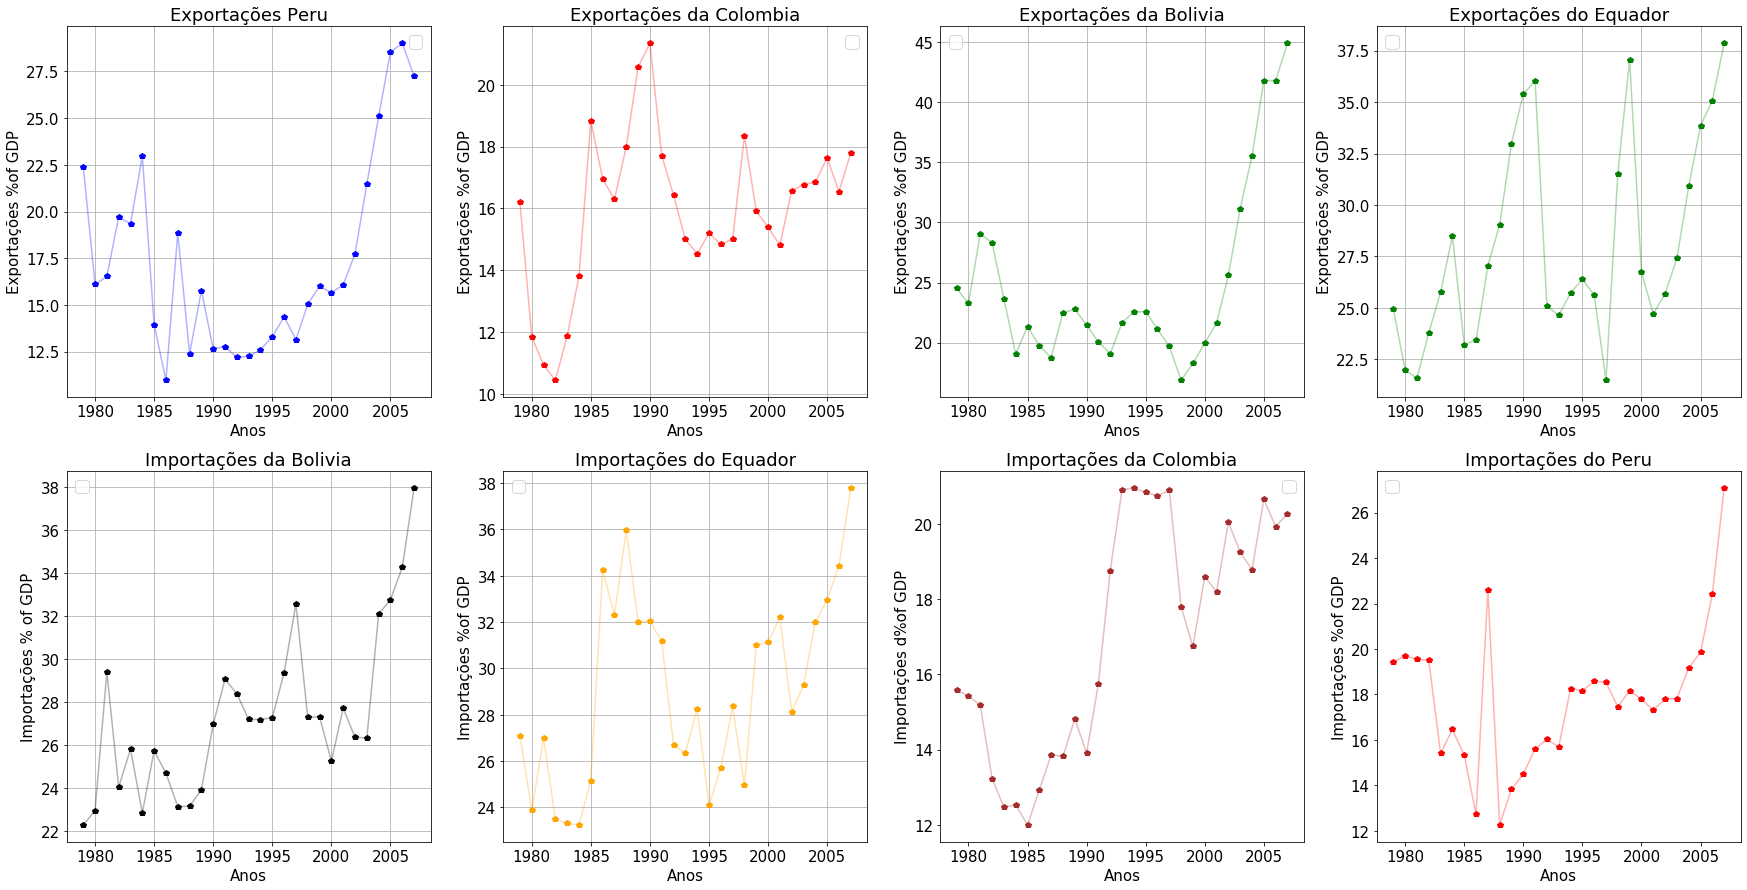

In [143]:
#definido a nossa lista tempo
t=range(1979,2008)

#separando o dados de cada país

#importações
y=dados_juntos.iloc[9,19:48]

equador_export=dados_juntos.iloc[8,19:48]

colombia_export=dados_juntos.iloc[7,19:48]

bolivia_export=dados_juntos.iloc[6,19:48]
#
#exportações
peru_import=dados_juntos.iloc[9,71:100]

equador_import=dados_juntos.iloc[8,71:100]

colombia_import=dados_juntos.iloc[7,71:100]

bolivia_import=dados_juntos.iloc[6,71:100]



#plotando os graficos
plt.rc("font",size=15)
fig=plt.figure(figsize=(30, 15))

#a=t.cov(inside_eua_export)/t.var()
#b=inside_eua_export.mean()-a*t.mean()
#plotando gráficos das Exportações
plt.subplot(241)
plot=plt.plot(t,y,'pb')
plot=plt.plot(t,y,'b',alpha=0.3)
plt.title('Exportações Peru')
plt.xlabel("Anos")
plt.ylabel("Exportações %of GDP")
plt.legend()
plt.grid(True)

plt.subplot(242)
plot=plt.plot(t,colombia_export,'pr')
plot=plt.plot(t,colombia_export,'r', alpha=0.3)
plt.title("Exportações da Colombia")
plt.xlabel("Anos")
plt.ylabel("Exportações %of GDP")
plt.legend()
plt.grid(True)

plt.subplot(243)
plot=plot=plt.plot(t,bolivia_export,'pg')
plot=plt.plot(t,bolivia_export,'g', alpha=0.3)
plt.title("Exportações da Bolivia")
plt.xlabel("Anos")
plt.ylabel("Exportações %of GDP")
plt.legend()
plt.grid(True)

plt.subplot(244)
plot=plot=plt.plot(t,equador_export,'pg')
plot=plt.plot(t,equador_export,'g', alpha=0.3)
plt.title("Exportações do Equador")
plt.xlabel("Anos")
plt.ylabel("Exportações %of GDP")
plt.legend()
plt.grid(True)

#plotando gráficos das Importações
plt.subplot(245)
plot=plt.plot(t,bolivia_import,'p',color="black")
plot=plt.plot(t,bolivia_import,color="black",alpha=0.3)
plt.title('Importações da Bolivia')
plt.xlabel("Anos")
plt.ylabel("Importações % of GDP")
plt.legend()
plt.grid(True)

plt.subplot(246)
plot=plt.plot(t,equador_import,'p',color="orange")
plot=plt.plot(t,equador_import,color="orange", alpha=0.3)
plt.title("Importações do Equador")
plt.xlabel("Anos")
plt.ylabel("Importações %of GDP")
plt.legend()
plt.grid(True)


plt.subplot(247)
plot=plot=plt.plot(t,colombia_import,'p',color="brown")
plot=plt.plot(t,colombia_import,color="brown", alpha=0.3)
plt.legend()
plt.title("Importações da Colombia")
plt.xlabel("Anos")
plt.ylabel("Importações d%of GDP")

plt.subplot(248)
plot=plot=plt.plot(t,peru_import,'p',color="red")
plot=plt.plot(t,peru_import,color="red", alpha=0.3)
plt.legend()
plt.title("Importações do Peru")
plt.xlabel("Anos")
plt.ylabel("Importações %of GDP")


plt.show()


ValueError: x and y must have same first dimension, but have shapes (28,) and (29,)

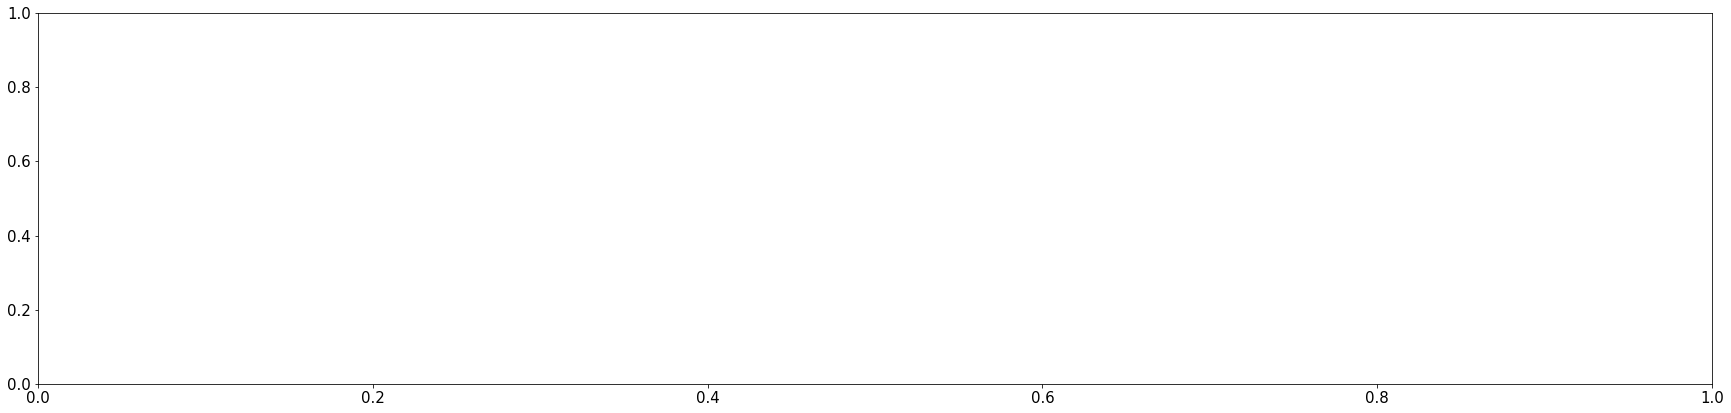

In [142]:
plt.rc("font",size=15)
fig=plt.figure(figsize=(30, 15))

plt.subplot(211)

plot=plt.plot(t,colombia_export,'pr')
plot=plt.plot(t,colombia_export,'r', alpha=0.3)
plot=plot=plt.plot(t,bolivia_export,'pg')
plot=plt.plot(t,bolivia_export,'g', alpha=0.3)
plot=plot=plt.plot(t,equador_export,'pg')
plot=plt.plot(t,equador_export,'g', alpha=0.3)

plt.title(" exportações dos países dentro da OTAN")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Exportações de materiais bélicos")
plt.legend()
plt.grid(True)




plt.subplot(212)
plot=plt.plot(t,inside_eua_import,'p',color="black")
plot=plt.plot(t,inside_eua_import,color="black",alpha=0.3)

plot=plt.plot(t,inside_france_import,'p',color="orange")
plot=plt.plot(t,inside_france_import,color="orange", alpha=0.3)

plot=plt.plot(t,inside_italy_import,'p',color="brown")
plot=plt.plot(t,inside_italy_import,color="brown", alpha=0.3)

plt.title("Importações dos países dentro da OTAN")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Importações de materiais bélicos")
plt.legend()
plt.grid(True)
